# Implementing PCA

In [2]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['target'] = iris.target

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [19]:
%pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

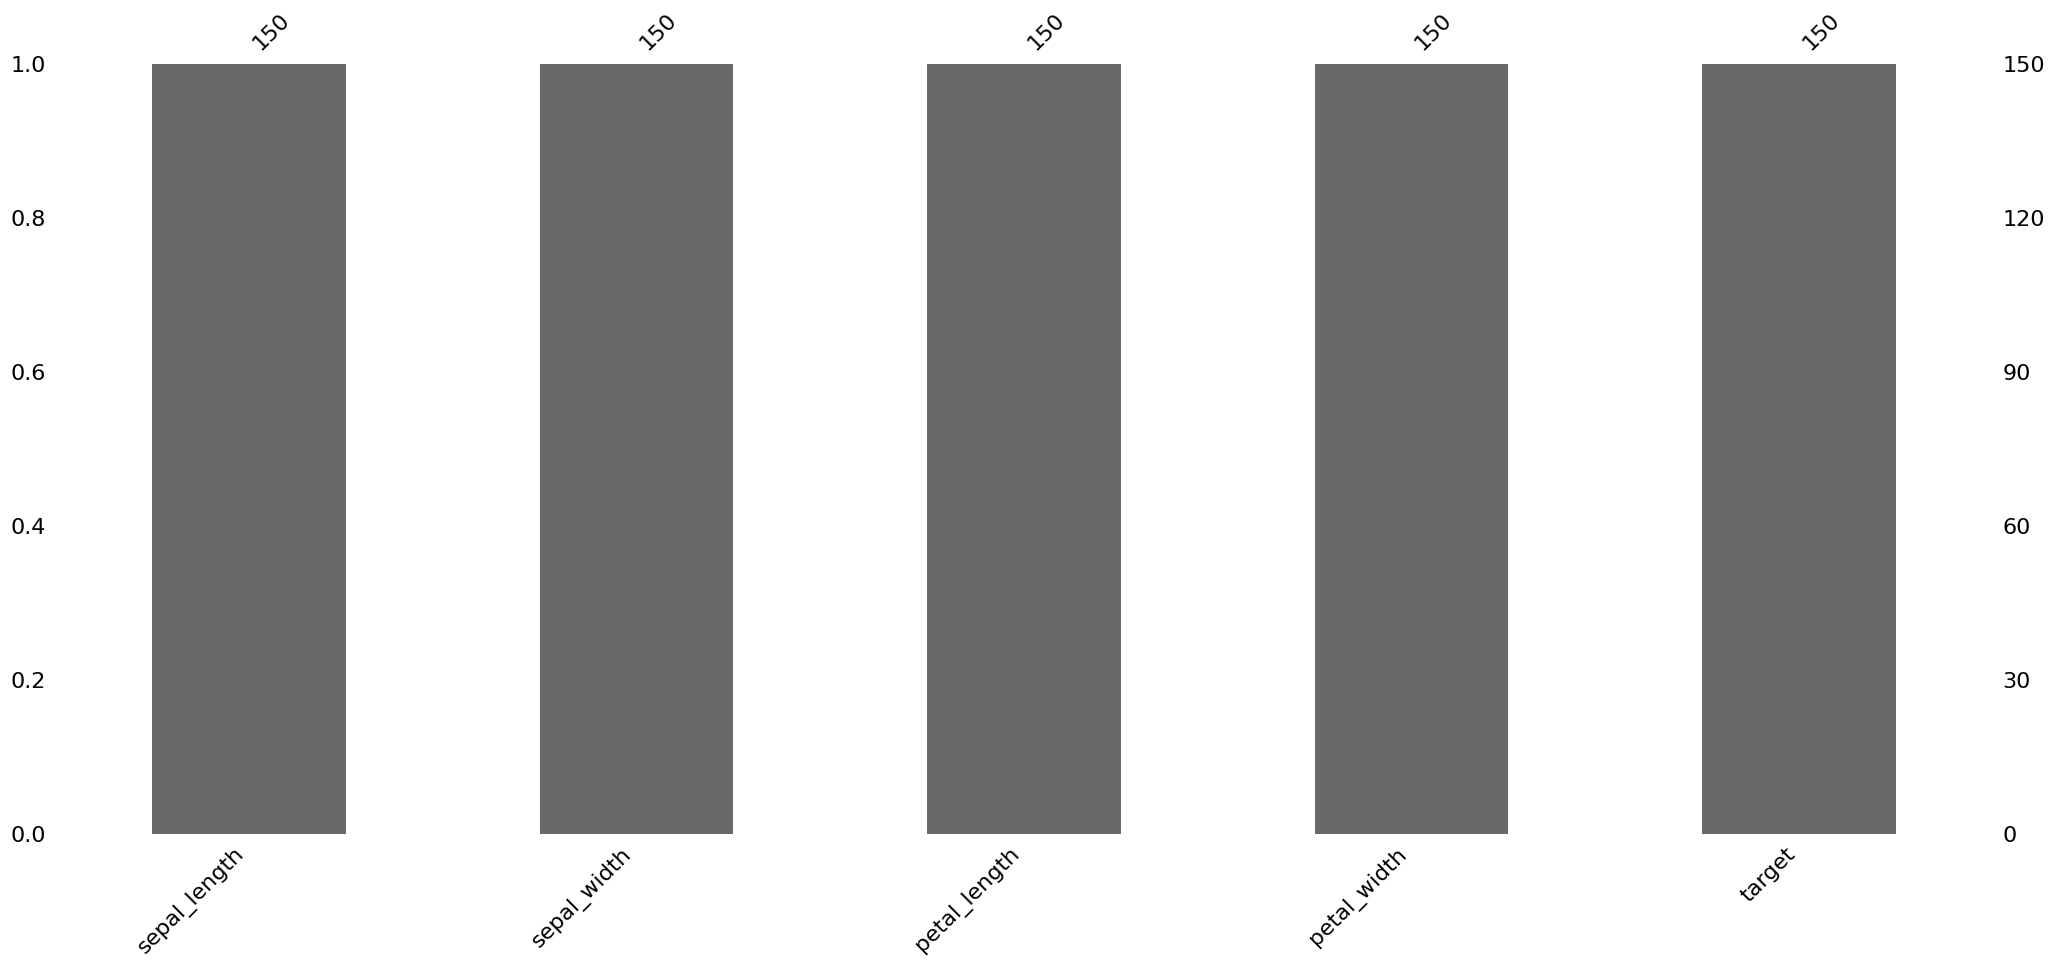

In [20]:
import missingno as msn
msn.bar(df)

# Check for class balancing
### approximately each class must have same number of training examples.
### can use smoting technique
### Not required in pca as pca is unsupervised

<Axes: xlabel='count', ylabel='target'>

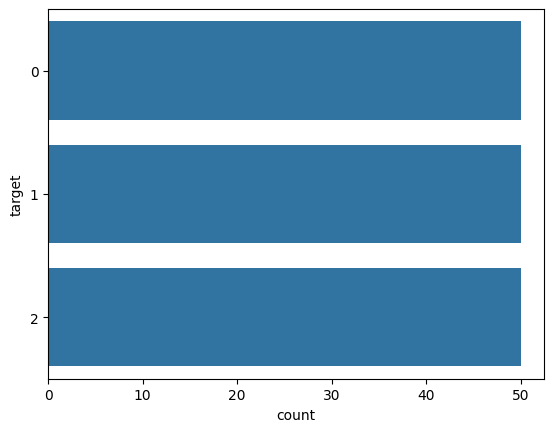

In [21]:
import seaborn as sns
sns.countplot(data= df, y= df['target'])

### Outliers are automatically removed in pca
### correlation is high then use feature selection or feature extraction

<Axes: >

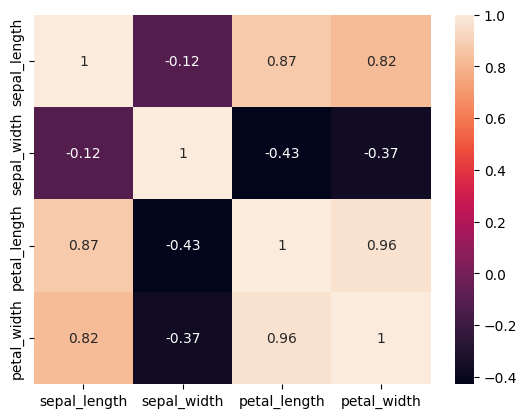

In [24]:
sns.heatmap(df.iloc[:,:4].corr(), annot=True)

#### 0.6 or lesser is acceptable
#### Scaling matrix so that it is centered around the mean.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:4])

In [34]:
# covariance_matrix = np.cov(X_scaled.T)
covariance_matrix = np.cov(X_scaled,rowvar = False)

In [39]:
values,vectors = np.linalg.eig(covariance_matrix)

In [40]:
values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [38]:
vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

#### Explained Variance is basically the percentage across different eigen values

In [43]:
explained_variance = []
for value in values:
    explained_variance.append((value/sum(values))*100)

In [44]:
explained_variance

[72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]

In [47]:
column1 = np.dot(X_scaled,vectors.T[0])
column2 = np.dot(X_scaled,vectors.T[1])

result = pd.DataFrame(column1, columns=['PC1'])
result['PC2'] = column2
result['target']= df.target

In [50]:
result

,PC1,PC2,target
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0
...,...,...,...
145,1.870503,-0.386966,2
146,1.564580,0.896687,2
147,1.521170,-0.269069,2
148,1.372788,-1.011254,2


<Axes: >

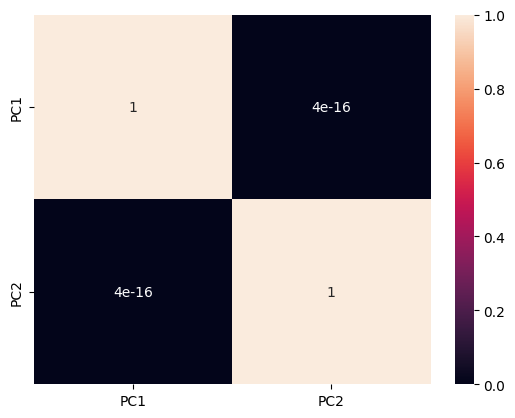

In [56]:
sns.heatmap(result.iloc[:,:2].corr(), annot=True)

<Axes: xlabel='PC1', ylabel='PC2'>

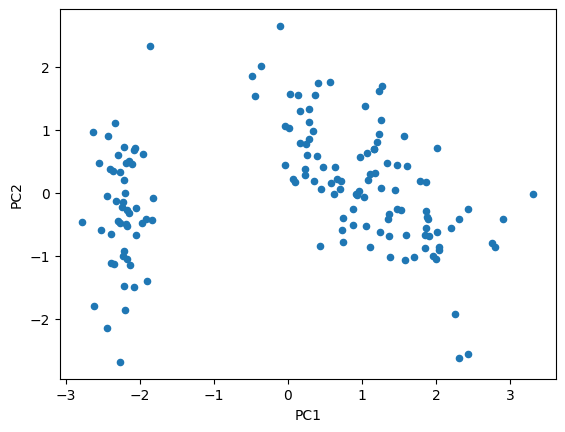

In [51]:
result.plot(kind='scatter', x='PC1', y='PC2')

#### Inbuilt implementation

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2,)
pca.fit_transform(X_scaled)

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [57]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])